In [161]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import altair as alt

In [2]:
df = pd.read_csv(r"C:\Users\ATOnile\Downloads\Titanic-Dataset.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:

df['Age'].interpolate(method='linear', inplace=True)


In [23]:
df['Cabin'].fillna( 'C85',inplace = True )

In [19]:
df['Embarked'].fillna('S', inplace = True)

In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [126]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [134]:
 df['Age'] = df['Age'].astype(float)

  explore categorical columns

In [137]:
categorical_column = df.select_dtypes(include = ['int64','float64']).columns
categorical_column

Index(['Age'], dtype='object')

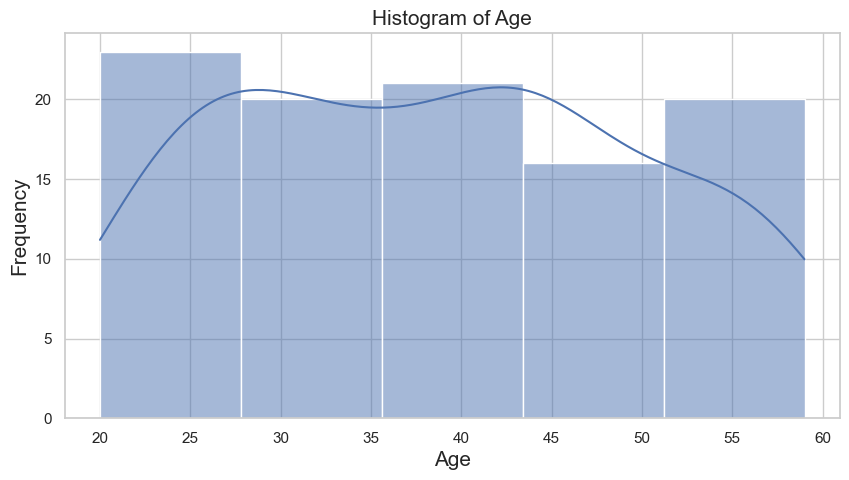

In [139]:
 for column in categorical_column:
   plt.figure(figsize=(10, 5))
   sns.histplot(df[column], bins = 5,kde = True)
   plt.title(f'Histogram of {column}',fontsize = 15)
   plt.xlabel(column, fontsize = 15)
   plt.ylabel('Frequency', fontsize = 15)

box plot 

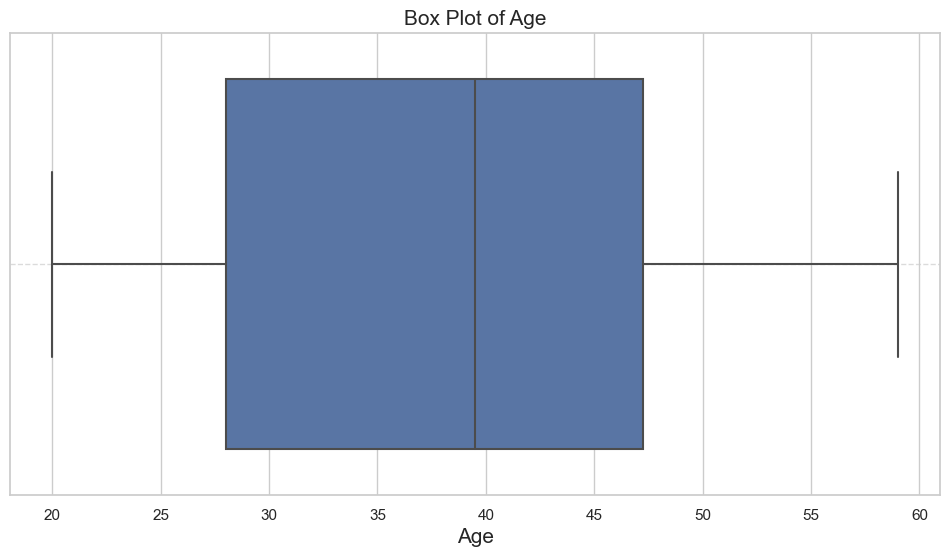

In [141]:
for column in categorical_column:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}',fontsize = 15)
    plt.xlabel(column, fontsize = 15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    

In [249]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,22.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [251]:
correlation_matrix = numerical_columns.corr()
correlation_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.025894,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.061558,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.306215,0.083081,0.018443,-0.549500
Age,0.025894,-0.061558,-0.306215,1.000000,-0.212362,-0.168513,0.087994
SibSp,-0.057527,-0.035322,0.083081,-0.212362,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.168513,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.087994,0.159651,0.216225,1.000000


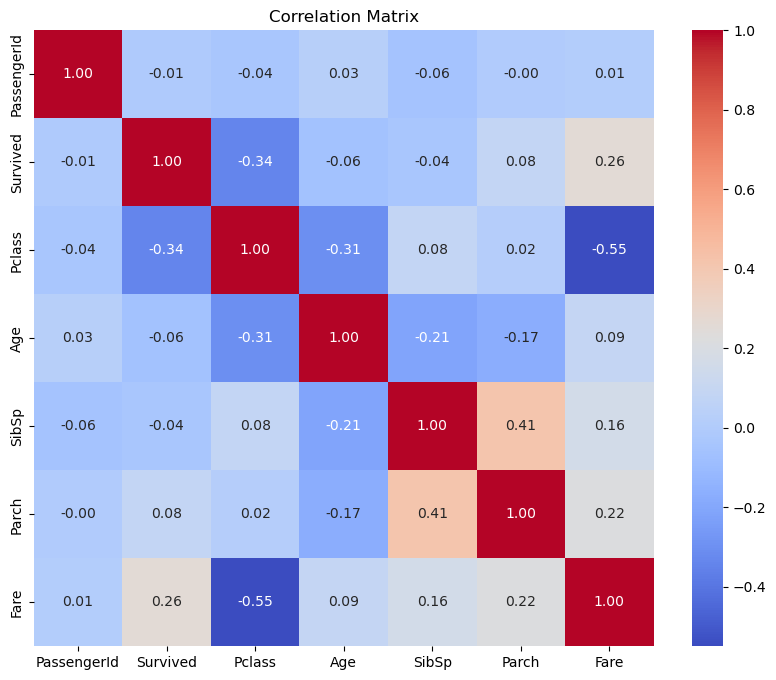

In [255]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# WEEK-4-TASK-2
feature engineering 

In [97]:
# extract titles fom name 
df['title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand = False)
df['title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: title, Length: 891, dtype: object

In [101]:
print('title' in df.columns)

True


In [103]:
print(df[['Name', 'title']].head())

                                                Name title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


In [37]:
df['title'].head(4)

0      Mr
1     Mrs
2    Miss
3     Mrs
Name: title, dtype: object

In [57]:
df['title'].value_counts()

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [49]:
# Create Age Groups
bins = [0,12,18,35,59,120]
label = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['age_group'] = pd.cut(df['Age'], bins = bins, labels = label )
df['age_group'].reset_index()

,index,age_group
0,0,Young Adult
1,1,Adult
2,2,Young Adult
3,3,Young Adult
4,4,Young Adult
...,...,...
886,886,Young Adult
887,887,Young Adult
888,888,Young Adult
889,889,Young Adult


In [51]:
df['age_group'].value_counts()

age_group
Young Adult    456
Adult          244
Teenager        86
Child           78
Senior          27
Name: count, dtype: int64

In [67]:
# Family Size
df['family_size'] = df['SibSp'] + df['Parch']+1
df['family_size'].reset_index()

,index,family_size
0,0,2
1,1,2
2,2,1
3,3,2
4,4,1
...,...,...
886,886,1
887,887,1
888,888,4
889,889,1


In [77]:
family_named_grouped = df.groupby(['family_size', 'title']).count()
family_named_grouped

PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  \
family_size title                                                            
1           Col                 2         2       2     2    2    2      2   
            Countess            1         1       1     1    1    1      1   
            Don                 1         1       1     1    1    1      1   
            Dr                  5         5       5     5    5    5      5   
            Jonkheer            1         1       1     1    1    1      1   
            Major               2         2       2     2    2    2      2   
            Miss              100       100     100   100  100  100    100   
            Mlle                2         2       2     2    2    2      2   
            Mme                 1         1       1     1    1    1      1   
            Mr                397       397     397   397  397  397    397   
            Mrs                20        20      20    20   20   20     20   
            Ms                  1         1       1     1    1    1      1   
            Rev                 4         4       4     4    4    4      4   
2           Lady                1         1       1     1    1    1      1   
            Master              3         3       3     3    3    3      3   
            Miss               27        27      27    27   27   27     27   
            Mr                 68        68      68    68   68   68     68   
            Mrs                59        59      59    59   59   59     59   
            Rev                 2         2       2     2    2    2      2   
            Sir                 1         1       1     1    1    1      1   
3           Capt                1         1       1     1    1    1      1   
            Dr                  2         2       2     2    2    2      2   
            Master             15        15      15    15   15   15     15   
            Miss               22        22      22    22   22   22     22   
            Mr                 35        35      35    35   35   35     35   
            Mrs                27        27      27    27   27   27     27   
4           Master              4         4       4     4    4    4      4   
            Miss               10        10      10    10   10   10     10   
            Mr                  6         6       6     6    6    6      6   
            Mrs                 9         9       9     9    9    9      9   
5           Master              2         2       2     2    2    2      2   
            Miss                9         9       9     9    9    9      9   
            Mr                  1         1       1     1    1    1      1   
            Mrs                 3         3       3     3    3    3      3   
6           Master              9         9       9     9    9    9      9   
            Miss                4         4       4     4    4    4      4   
            Mr                  5         5       5     5    5    5      5   
            Mrs                 4         4       4     4    4    4      4   
7           Master              3         3       3     3    3    3      3   
            Miss                6         6       6     6    6    6      6   
            Mr                  1         1       1     1    1    1      1   
            Mrs                 2         2       2     2    2    2      2   
8           Master              3         3       3     3    3    3      3   
            Miss                1         1       1     1    1    1      1   
            Mr                  1         1       1     1    1    1      1   
            Mrs                 1         1       1     1    1    1      1   
11          Master              1         1       1     1    1    1      1   
            Miss                3         3       3     3    3    3      3   
            Mr                  3         3       3     3    3    3      3   

                      Parch  Ticket  Fare  

In [83]:
# Create a pivot table with family_size and title
pivot_table = df.pivot_table(index='family_size', columns='Name', aggfunc='size', fill_value=0)

# Reset index to flatten the DataFrame
pivot_table_reset = pivot_table.reset_index()
pivot_table_reset 

Name,family_size,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Aks, Mrs. Sam (Leah Rosen)",...,"Yrois, Miss. Henriette (""Mrs Harbeck"")","Zabour, Miss. Hileni","Zabour, Miss. Thamine","Zimmerman, Mr. Leo","de Messemaeker, Mrs. Guillaume Joseph (Emma)","de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon"
0,1,1,0,0,0,0,1,1,0,0,...,1,0,0,1,0,1,1,0,0,1
1,2,0,0,0,1,1,0,0,1,1,...,0,1,1,0,1,0,0,1,0,0
2,3,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
#  IsAlone Feature
df['alone'] = (df['family_size']==1).astype(int)
df['alone'].reset_index()

,index,alone
0,0,0
1,1,0
2,2,1
3,3,0
4,4,1
...,...,...
886,886,1
887,887,1
888,888,0
889,889,1


In [91]:
df['alone'].value_counts()

alone
1    537
0    354
Name: count, dtype: int64

In [113]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'family_size', 'alone', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'title_Col', 'title_Countess', 'title_Don',
       'title_Dr', 'title_Jonkheer', 'title_Lady', 'title_Major',
       'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
       'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir', 'age_group_Teenager',
       'age_group_Young Adult', 'age_group_Adult', 'age_group_Senior'],
      dtype='object')


In [109]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns = ['Sex', 'Embarked', 'title', 'age_group'],drop_first=True)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,C85,...,False,True,False,False,False,False,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,True,False,False,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,C85,...,False,False,False,False,False,False,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,True,False,False,False,False,True,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,C123,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,C50,...,False,False,False,False,True,False,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,...,False,False,False,False,False,False,False,True,False,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",22.5,1,2,W./C. 6607,23.4500,B42,...,False,False,False,False,False,False,False,True,False,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,...,False,True,False,False,False,False,False,True,False,False


In [125]:
# Interaction Terms 
df['Pclass_Sex'] = df['Pclass'] * df['Sex_male']
df['Pclass_Sex'].value_counts().reset_index()

,Pclass_Sex,count
0,3,347
1,0,314
2,1,122
3,2,108


In [140]:
scaler = MinMaxScaler()
df['MinMax_Fare'] = scaler.fit_transform(df[['Fare']])
df['MinMax_Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: MinMax_Fare, Length: 891, dtype: float64

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,title_Ms,title_Rev,title_Sir,age_group_Teenager,age_group_Young Adult,age_group_Adult,age_group_Senior,Pclass_Sex,MinMaxFare,MinMax_Fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,C85,...,False,False,False,False,True,False,False,3,0.014151,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,True,False,0,0.139136,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,C85,...,False,False,False,False,True,False,False,0,0.015469,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,False,False,True,False,False,0,0.103644,0.103644
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,C123,...,False,False,False,False,True,False,False,3,0.015713,0.015713


# WEEK_4_TASK_3

In [147]:
from vega_datasets import data
df = data.cars()
df

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA
...,...,...,...,...,...,...,...,...,...
401,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,1982-01-01,USA
402,vw pickup,44.0,4,97.0,52.0,2130,24.6,1982-01-01,Europe
403,dodge rampage,32.0,4,135.0,84.0,2295,11.6,1982-01-01,USA
404,ford ranger,28.0,4,120.0,79.0,2625,18.6,1982-01-01,USA


In [149]:
df.isnull().sum()

Name                0
Miles_per_Gallon    8
Cylinders           0
Displacement        0
Horsepower          6
Weight_in_lbs       0
Acceleration        0
Year                0
Origin              0
dtype: int64

In [153]:
median_value = df['Miles_per_Gallon'].median()
median_value

23.0

In [155]:
df['Miles_per_Gallon'].fillna(median_value, inplace = True)

In [157]:
df['Horsepower'].ffill(inplace = True)

In [159]:
df.isnull().sum()

Name                0
Miles_per_Gallon    0
Cylinders           0
Displacement        0
Horsepower          0
Weight_in_lbs       0
Acceleration        0
Year                0
Origin              0
dtype: int64

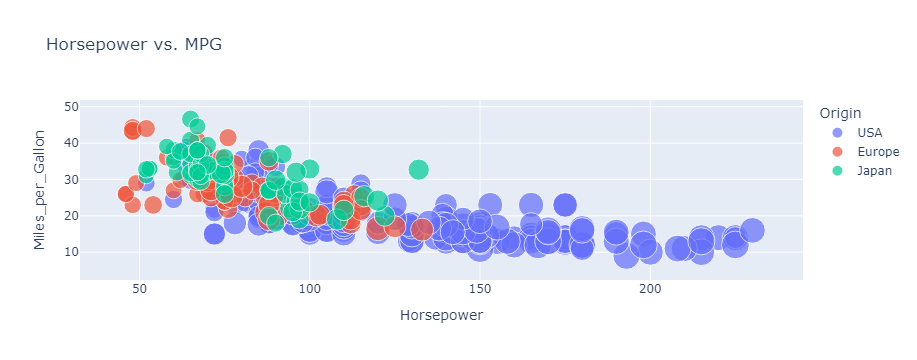

In [169]:
fg = px.scatter(df, x='Horsepower', y = 'Miles_per_Gallon',color='Origin',size='Weight_in_lbs', hover_data=['Name'],title='Horsepower vs. MPG' )
fg.show()

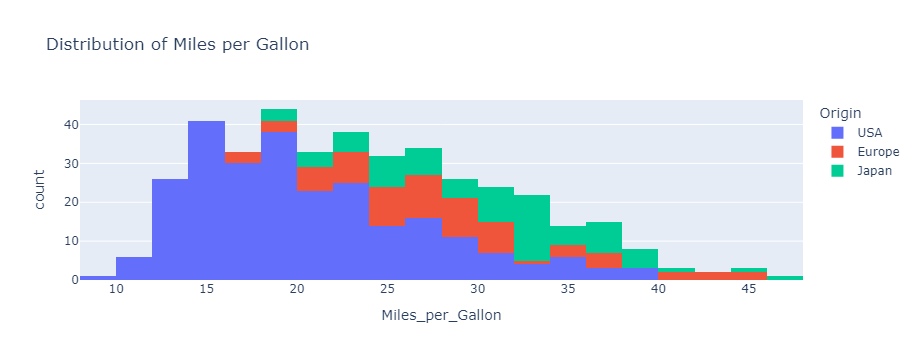

In [175]:
 fg = px.histogram(df, x= 'Miles_per_Gallon', nbins=30,color='Origin',title='Distribution of Miles per Gallon' )
 fg.show()

In [187]:
# Scatter plot using Altair
scatter_plot = alt.Chart(df).mark_circle(size=60).encode( x='Horsepower', y='Miles_per_Gallon',color='Origin').interactive().properties(
    title='Horsepower vs. MPG')
scatter_plot.show()

alt.Chart(...)

In [189]:
# Histogram using Altair
histogram = alt.Chart(df).mark_bar().encode(
    alt.X('Miles_per_Gallon', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='Origin'
).interactive().properties(
    title='Distribution of Miles per Gallon'
)

# Show the plot
histogram.show()

alt.Chart(...)

In [193]:
# Bar chart using Altair
bar_chart = alt.Chart(df).mark_bar().encode(
    x='Origin',
    y='average(Miles_per_Gallon)',
    color='Origin'
).interactive().properties(
    title='Average MPG by Origin'
)

# Show the plot
bar_chart.show()

alt.Chart(...)

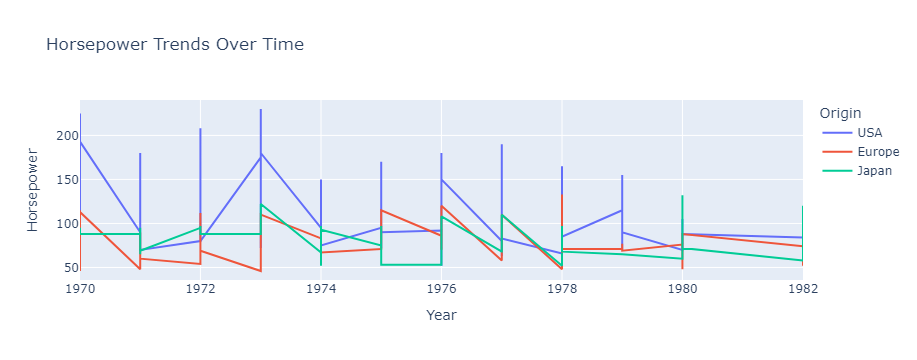

In [195]:
# Line plot using Plotly
fig = px.line(df, 
              x='Year', 
              y='Horsepower', 
              color='Origin',
              title='Horsepower Trends Over Time')

# Show the plot
fig.show()

# WEEK-4_TASK4

In [22]:
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, 30, None, 45, 40],
    'Gender': ['Female', 'Male', 'Male', 'Female', 'Female'],
    'Salary': [50000, 60000, None, 70000, 80000],
    'City': ['New York', 'Los Angeles', 'Chicago', None, 'Houston']
}
df = pd.DataFrame(data)
df

,Name,Age,Gender,Salary,City
0,Alice,25.0,Female,50000.0,New York
1,Bob,30.0,Male,60000.0,Los Angeles
2,Charlie,NaN,Male,NaN,Chicago
3,David,45.0,Female,70000.0,None
4,None,40.0,Female,80000.0,Houston


In [26]:
# check missing values 
df.isnull().sum()

Name      1
Age       1
Gender    0
Salary    1
City      1
dtype: int64

In [32]:
df['Name'].fillna('amna', inplace = True)

In [36]:
mean_value = df['Salary'].mean()
df['Salary'].fillna(mean_value, inplace = True)

In [38]:
df['Age'].interpolate(method = 'linear', inplace = True)

In [40]:
 mode_value = df['City'].mode()[0]
 df['City'].fillna(mode_value, inplace = True)

In [42]:
df

,Name,Age,Gender,Salary,City
0,Alice,25.0,Female,50000.0,New York
1,Bob,30.0,Male,60000.0,Los Angeles
2,Charlie,37.5,Male,65000.0,Chicago
3,David,45.0,Female,70000.0,Chicago
4,amna,40.0,Female,80000.0,Houston


In [49]:
# detect and handle outliers 
q1 = df['Salary'].quantile(0.25)
q1

60000.0

In [53]:
q3 = df['Salary'].quantile(0.75)
q3

70000.0

In [55]:
IQR = q3-q1
IQR

10000.0

In [58]:
# detect outliers
lower_bound = q1-1.5*IQR
lower_bound 

45000.0

In [60]:
upper_bound = q3+1.5*IQR
upper_bound

85000.0

In [64]:
# remove outliesrs
dfr = df[(df['Salary']>= lower_bound) & (df['Salary']<=upper_bound)]
dfr

,Name,Age,Gender,Salary,City
0,Alice,25.0,Female,50000.0,New York
1,Bob,30.0,Male,60000.0,Los Angeles
2,Charlie,37.5,Male,65000.0,Chicago
3,David,45.0,Female,70000.0,Chicago
4,amna,40.0,Female,80000.0,Houston


In [66]:
# to check correct data type
df.dtypes

Name       object
Age       float64
Gender     object
Salary    float64
City       object
dtype: object

In [72]:
# Display unique values in 'Gender'
df['Gender'].unique

<bound method Series.unique of 0    Female
1      Male
2      Male
3    Female
4    Female
Name: Gender, dtype: object>

In [78]:
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(20, 60, 100),
    'Salary': np.random.randint(30000, 120000, 100),
    'Experience': np.random.randint(1, 40, 100),
    'Department': np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], 100),
    'Gender': np.random.choice(['Male', 'Female'], 100)
})

In [80]:
df.head()

,Age,Salary,Experience,Department,Gender
0,58,119135,16,HR,Male
1,48,65222,33,IT,Female
2,34,107373,9,HR,Female
3,27,109575,6,Finance,Female
4,40,114651,16,Finance,Male


In [82]:
df.isnull().sum()

Age           0
Salary        0
Experience    0
Department    0
Gender        0
dtype: int64

In [84]:
df.dtypes

Age            int32
Salary         int32
Experience     int32
Department    object
Gender        object
dtype: object

In [86]:
# summeries of statistics
df.describe()

,Age,Salary,Experience
count,100.000000,100.000000,100.00000
mean,38.790000,78526.890000,21.70000
std,11.556008,25930.444385,11.30433
min,20.000000,30206.000000,1.00000
25%,28.000000,55789.750000,12.00000
50%,39.500000,81544.000000,22.50000
75%,47.250000,98107.250000,32.25000
max,59.000000,119474.000000,39.00000


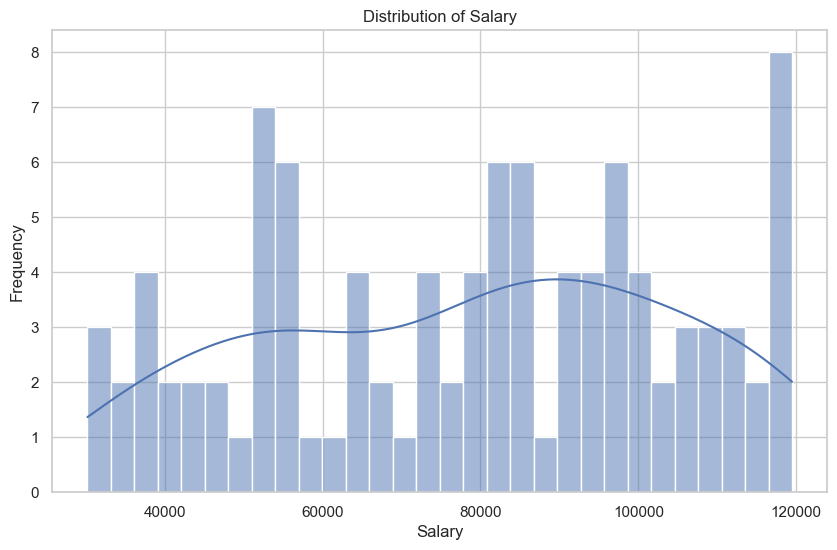

In [94]:
# lwts create some visiuilization 
plt.figure(figsize=(10, 6))
sns.histplot(df['Salary'], bins = 30, kde = True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

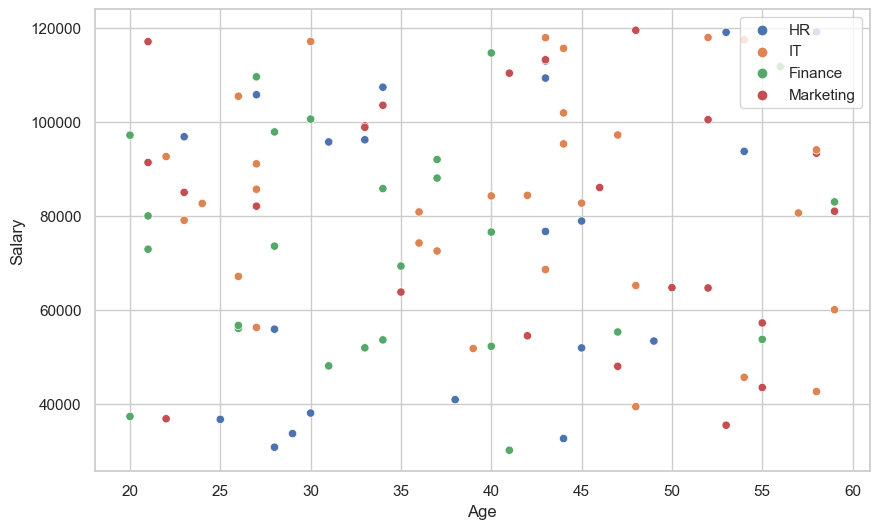

In [122]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= 'Age', y = 'Salary', data = df, hue = 'Department' )
plt.legend(loc='upper right')
plt.show()

In [106]:
heatmap = df.select_dtypes(include = 'int32')
heatmap

,Age,Salary,Experience
0,58,119135,16
1,48,65222,33
2,34,107373,9
3,27,109575,6
4,40,114651,16
...,...,...,...
95,28,97863,6
96,27,82083,35
97,31,95733,37
98,53,119045,24


In [108]:
corelation = heatmap.corr()
corelation

,Age,Salary,Experience
Age,1.000000,0.030808,-0.033272
Salary,0.030808,1.000000,-0.086757
Experience,-0.033272,-0.086757,1.000000


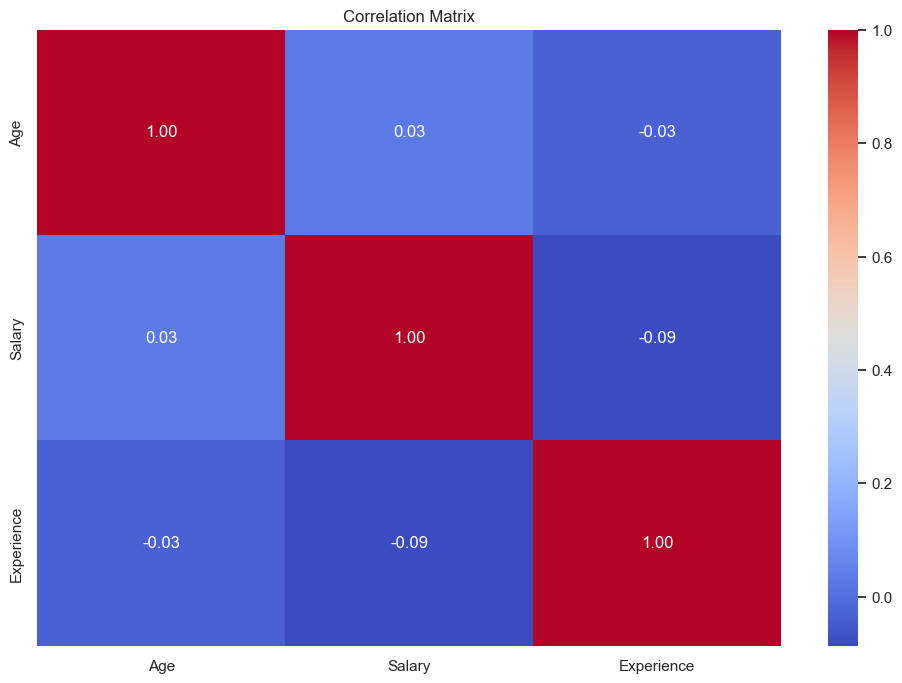

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(corelation, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()